In [1]:
import striplog

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
facies = {
    'sand'  : striplog.Component({'lithology' : 'S'}),
    'shale' : striplog.Component({'lithology' : 'SH'})
}

sand_decor = striplog.Decor({
    'component': facies['sand'],
    'colour': 'yellow',
    'hatch': '.'
})

shale_decor = striplog.Decor({
    'component': facies['shale'],
    'colour': 'darkgray',
    'hatch': '-'
})

legend = striplog.Legend([sand_decor, shale_decor])

In [3]:
# sand interval -- fixed width
sand1 = striplog.Interval(
        top = 1000.,
        base = 1005.,
        components = [facies['sand']],
        data = {'gs' : 2.0}
)

# shale interval -- fixed width
shale1 = striplog.Interval(
        top = 1005.,
        base = 1010.,
        components = [facies['shale']],
        data = {'gs' : 0.5}
)

# sand interval -- variable width
sand_gs = np.array([
    [1010.5, 2.5],
    [1012., 2.2],
    [1014., 2.7]
])

sand2 = striplog.Interval(
        top = 1010.,
        base = 1015.,
        components = [facies['sand']],
        data = {'gs' : sand_gs}
)

# shale interval -- variable width
shale_gs = np.array([
    [1015., 0.3],
    [1017., 0.5],
    [1018., 0.7]
])

shale2 = striplog.Interval(
        top = 1015.,
        base = 1020.,
        components = [facies['shale']],
        data = {'gs' : shale_gs}
)

In [4]:
slog = striplog.Striplog([sand1, shale1, sand2, shale2])

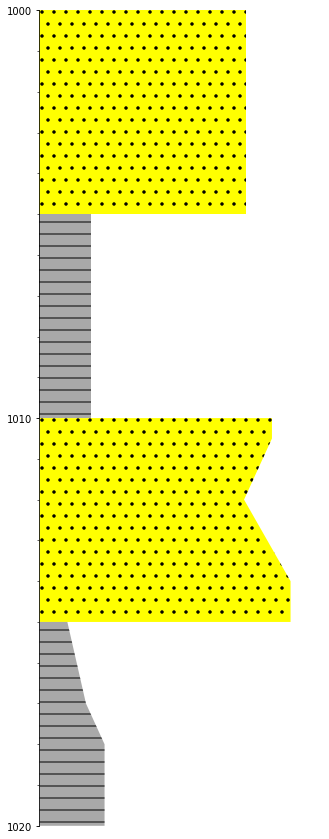

In [5]:
fig, ax = plt.subplots(figsize=(5,15))

ax = slog.plot(field='gs', ax=ax, legend=legend)